In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text  # Save the HTML content as html_data

# Step 2: Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Locate the Tesla Revenue table
# Assuming the relevant table is the first table on the page
tables = pd.read_html(html_data)
tesla_revenue = tables[0]  # Assuming the first table is the one we need

# Step 4: Rename columns to match "Date" and "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

# Step 5: Clean the Revenue column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Step 6: Drop any rows with null or empty values in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Step 7: Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


/tmp/ipykernel_1769/3421288614.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


In [2]:
!pip install matplotlib

In [9]:
import yfinance as yf

# Get Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index for easier manipulation later
tesla_data.reset_index(inplace=True)

# Display the first few rows of the data to verify
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [12]:
import matplotlib.pyplot as plt


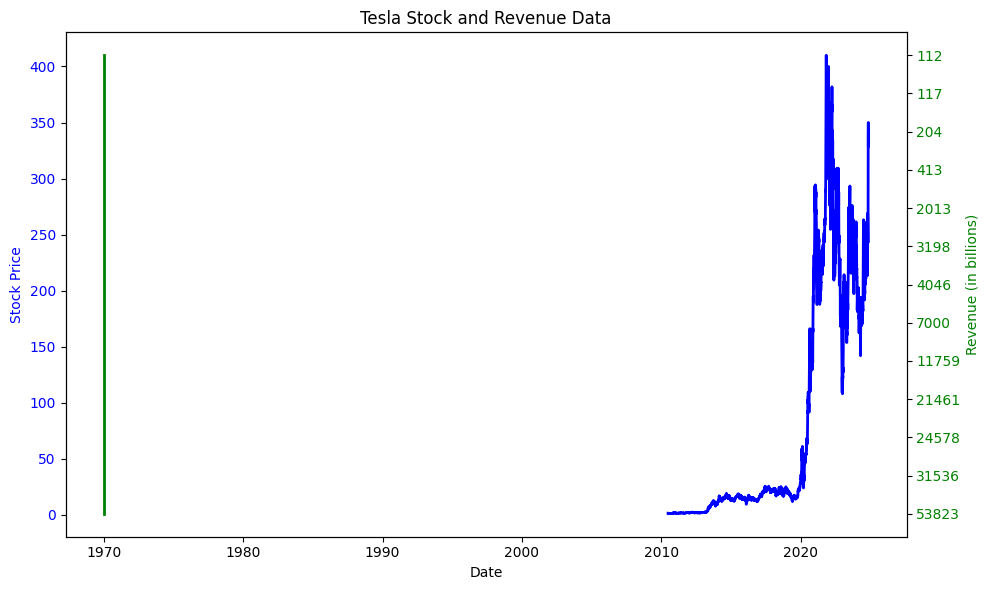

In [13]:
# Make sure the necessary data (tesla_data and tesla_revenue) is available

# Assuming make_graph function is defined as shown earlier:
def make_graph(stock_data, revenue_data, title):
    # Convert Date columns to datetime if not already in datetime format
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    # Plotting the stock data and revenue data
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot stock closing price (for example)
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price', linewidth=2)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create a second y-axis to plot revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue', linewidth=2)
    ax2.set_ylabel('Revenue (in billions)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Add a title and show the plot
    plt.title(f'{title} Stock and Revenue Data')
    fig.tight_layout()
    plt.show()

# Now invoke the make_graph function for Tesla data:
make_graph(tesla_data, tesla_revenue, 'Tesla')
